In [1]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
%cd drive/MyDrive/TechLabs/02_Data\ Manipulation/Part\ C\ -\ Pandas

/content/drive/MyDrive/TechLabs/02_Data Manipulation/Part C - Pandas


In [3]:
# This is the convention used to import Pandas.
import pandas as pd
import numpy as np

In [4]:
# These commands load the data from googlecolab
bycountrywaste = pd.read_csv("data/cei_pc031_page_linear.csv")

In [6]:
bycountrywaste.head()


,DATAFLOW,LAST UPDATE,freq,wst_oper,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2013,325,s
1,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2014,425,s
2,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2015,491,s
3,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2016,452,e
4,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2017,436,e


In [7]:
#delete irrelevant columns for data analysis
bycountrywaste.drop("DATAFLOW", inplace=True, axis=1)
bycountrywaste.drop("LAST UPDATE", inplace=True, axis=1)
bycountrywaste.drop("freq", inplace=True, axis=1)
bycountrywaste.drop("wst_oper", inplace=True, axis=1)
bycountrywaste.drop("unit", inplace=True, axis=1)
bycountrywaste.drop("OBS_FLAG", inplace=True, axis=1)
bycountrywaste.head()

,geo,TIME_PERIOD,OBS_VALUE
0,AL,2013,325
1,AL,2014,425
2,AL,2015,491
3,AL,2016,452
4,AL,2017,436


In [8]:
bycountrywaste.rename(columns={"geo": "region_id", "TIME_PERIOD":"year", "OBS_VALUE":"municipal_waste_kg_per_capita"}, inplace=True)
bycountrywaste.head()

,region_id,year,municipal_waste_kg_per_capita
0,AL,2013,325
1,AL,2014,425
2,AL,2015,491
3,AL,2016,452
4,AL,2017,436


In [9]:
#add a new column and assign the country name to it
bycountrywaste["country_name"]=bycountrywaste.region_id.replace({"EU27_2020": "European Union - 27 countries (from 2020)","EU28": "European Union - 28 countries (2013-2020)",
"EA20": "Euro area – 20 countries (from 2023)",
"EA19": "Euro area - 19 countries (2015-2022)",
"BE": "Belgium",
"BG": "Bulgaria",
"CZ": "Czechia",
"DK": "Denmark",
"DE": "Germany (until 1990 former territory of the FRG)",
"EE": "Estonia",
"IE": "Ireland",
"EL": "Greece",
"ES": "Spain",
"FR": "France",
"HR": "Croatia",
"CY": "Cyprus",
"IT": "Italy",
"IS": "Iceland",
"LV": "Latvia",
"LT": "Lithuania",
"LU": "Luxembourg",
"HU": "Hungary",
"MT": "Malta",
"NL": "Netherlands",
"AT": "Austria",
"PL": "Poland",
"PT": "Portugal",
"RO": "Romania",
"SI": "Slovenia",
"SK": "Slovakia",
"FI": "Finland",
"SE": "Sweden",
"IS": "Iceland",
"LI": "Lichtenstein",
"NO": "Norway",
"CH": "Switzerland",
"UK": "United Kingdom",
"BA": "Bosnia and Herzegovina",
"ME": "Montenegro",
"MK": "North Macedonia",
"AL": "Albania",
"RS": "Serbia",
"TR": "Türkiye",
"XK": "Kosovo (under United Nations Security Council Resolution 1244/99)"
})

In [10]:
#number assigend values in "region_id" (ok)
bycountrywaste["region_id"].nunique()

39

In [11]:
#compare the number assigend values in "country_name" with "region_id" (ok)
bycountrywaste["country_name"].nunique()

39

In [13]:
#move column "country_name"
column_to_move = bycountrywaste.pop("country_name")
bycountrywaste.insert(0, "country_name", column_to_move)
bycountrywaste.head(5)

,country_name,region_id,year,municipal_waste_kg_per_capita
0,Albania,AL,2013,325
1,Albania,AL,2014,425
2,Albania,AL,2015,491
3,Albania,AL,2016,452
4,Albania,AL,2017,436


In [14]:
bycountrywastepivot = np.round(pd.pivot_table(bycountrywaste, values="municipal_waste_kg_per_capita", index=["country_name", "region_id"], columns="year", aggfunc=np.mean),2)
bycountrywastepivot.head()

,year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country_name,region_id,,,,,,,,,,,,,,,,,,,,,
Albania,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,325.0,425.0,491.0,452.0,436.0,462.0,381.0,369.0,311.0
Austria,AT,580.0,576.0,608.0,607.0,574.0,575.0,597.0,597.0,600.0,590.0,...,579.0,578.0,565.0,560.0,564.0,570.0,579.0,588.0,834.0,NaN
Belgium,BE,471.0,467.0,482.0,465.0,485.0,482.0,485.0,493.0,480.0,467.0,...,445.0,436.0,425.0,412.0,419.0,411.0,409.0,416.0,729.0,759.0
Bosnia and Herzegovina,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.0,354.0,...,340.0,311.0,349.0,340.0,354.0,352.0,356.0,352.0,NaN,NaN
Bulgaria,BG,612.0,596.0,602.0,603.0,599.0,588.0,577.0,553.0,599.0,598.0,...,460.0,432.0,442.0,419.0,404.0,435.0,407.0,442.0,408.0,NaN


In [15]:
# this step is very important
# I decided to fill all missing values with the mean values. This way we have a full dataset for all countries and all years.
bycountrywastepivot = pd.pivot_table(bycountrywaste, values="municipal_waste_kg_per_capita", index=["country_name", "region_id"], columns="year", aggfunc=np.mean)
bycountrywastepivot = bycountrywastepivot.apply(lambda x: x.fillna(x.mean()), axis=1)
bycountrywastepivot = bycountrywastepivot.round(2)

# Overwrite the original dataframe with the modified one
bycountrywastepivot.head()


,year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country_name,region_id,,,,,,,,,,,,,,,,,,,,,
Albania,AL,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,...,405.78,325.0,425.0,491.0,452.0,436.0,462.0,381.0,369.00,311.00
Austria,AT,580.00,576.00,608.00,607.00,574.00,575.00,597.00,597.00,600.00,590.00,...,579.00,578.0,565.0,560.0,564.0,570.0,579.0,588.0,834.00,593.14
Belgium,BE,471.00,467.00,482.00,465.00,485.00,482.00,485.00,493.00,480.00,467.00,...,445.00,436.0,425.0,412.0,419.0,411.0,409.0,416.0,729.00,759.00
Bosnia and Herzegovina,BA,344.67,344.67,344.67,344.67,344.67,344.67,344.67,344.67,356.00,354.00,...,340.00,311.0,349.0,340.0,354.0,352.0,356.0,352.0,344.67,344.67
Bulgaria,BG,612.00,596.00,602.00,603.00,599.00,588.00,577.00,553.00,599.00,598.00,...,460.00,432.0,442.0,419.0,404.0,435.0,407.0,442.0,408.00,516.10


In [16]:
# Unpivot the pivoted DataFrame back to its original form
bycountrywaste = pd.melt(bycountrywastepivot.reset_index(), id_vars=['country_name', 'region_id'], var_name='year', value_name='municipal_waste_kg_per_capita')

# Round the municipal_waste_kg_per_capita column to two decimal places
bycountrywaste['municipal_waste_kg_per_capita'] = bycountrywaste['municipal_waste_kg_per_capita'].round(2)

# Display the resulting DataFrame
print(bycountrywaste)

               country_name region_id  year  municipal_waste_kg_per_capita
0                   Albania        AL  2000                         405.78
1                   Austria        AT  2000                         580.00
2                   Belgium        BE  2000                         471.00
3    Bosnia and Herzegovina        BA  2000                         344.67
4                  Bulgaria        BG  2000                         612.00
..                      ...       ...   ...                            ...
853                   Spain        ES  2021                         472.00
854                  Sweden        SE  2021                         418.00
855             Switzerland        CH  2021                         704.00
856                 Türkiye        TR  2021                         429.43
857          United Kingdom        UK  2021                         531.11

[858 rows x 4 columns]


In [17]:
%matplotlib inline
import seaborn as sns  #for plotting
sns.set_style("darkgrid")
import matplotlib.pyplot as plt # for showing plots

<function matplotlib.pyplot.show(close=None, block=None)>

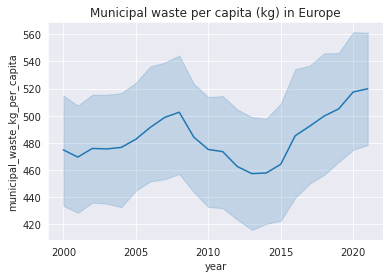

In [18]:
#the line plot shows that we shall not use regression model, but polynomial or any other non-linear
sns.lineplot(x="year", y="municipal_waste_kg_per_capita", data = bycountrywaste)
plt.title('Municipal waste per capita (kg) in Europe')
plt.show

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [20]:
# for polynomial all data type shall be in "float"
print(bycountrywaste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_name                   858 non-null    object 
 1   region_id                      858 non-null    object 
 2   year                           858 non-null    object 
 3   municipal_waste_kg_per_capita  858 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.9+ KB
None


In [22]:
#you can not convert directly to float
#Step 1: convert country_name and region_id to int64
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

bycountrywaste['country_name'] = le.fit_transform(bycountrywaste['country_name'])
bycountrywaste['region_id'] = le.fit_transform(bycountrywaste['region_id'])

print(bycountrywaste.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_name                   858 non-null    int64  
 1   region_id                      858 non-null    int64  
 2   year                           858 non-null    object 
 3   municipal_waste_kg_per_capita  858 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.9+ KB
None


In [23]:
#Step 2: convert to float
bycountrywaste = bycountrywaste.astype(float)
print(bycountrywaste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_name                   858 non-null    float64
 1   region_id                      858 non-null    float64
 2   year                           858 non-null    float64
 3   municipal_waste_kg_per_capita  858 non-null    float64
dtypes: float64(4)
memory usage: 26.9 KB
None


In [27]:
# POLYNOMIAL regression
# Extract the independent variable (year) and dependent variable (waste)
X = bycountrywaste.iloc[:, 0:1].values
y = bycountrywaste.iloc[:, 1].values

# Fit a polynomial regression model with degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

# Predict values for the next 5 years
X_pred = np.array([[2022], [2023], [2024], [2025], [2026]])
X_pred_poly = poly.fit_transform(X_pred)
y_pred = lin2.predict(X_pred_poly)

# Create a list of years that includes the original years and the next 5 predicted years
years = list(range(2000, 2022)) + [2022, 2023, 2024, 2025, 2026]

# Check the length of y_pred
if len(y_pred) == 5:
    # Combine the actual data and predicted values into a single table
    forecast = pd.DataFrame({'year': years, 'municipal_waste_kg_per_capita': np.concatenate((y, y_pred))})

    # Display the combined table
    print(forecast)
else:
    print("Error: y_pred does not have 5 elements")


ValueError: ignored

In [26]:
#this is the  LINEAR regression 

# create a new dataframe with missing values filled with country mean
bycountrywastepivot_filled = bycountrywastepivot.fillna(bycountrywastepivot.groupby(['country_name']).transform('mean'))

# create a new dataframe for predictions
prediction_bycountrywastepivot = pd.DataFrame(columns=bycountrywastepivot_filled.columns)

# iterate through each country and perform linear regression
for country in bycountrywastepivot_filled.index.levels[0]:
    # select data for the current country
    data = bycountrywastepivot_filled.loc[country].dropna(axis=1)
    
    # check if there is enough data for linear regression
    if data.shape[1] < 2:
        continue
        
    # create a linear regression model
    lr_model = LinearRegression()
    
    # fit the model to the data
    X = data.columns.values.reshape(-1, 1)
    y = data.values.reshape(-1, 1)
    lr_model.fit(X, y)
    
    # make predictions for the next 4 years
    X_pred = np.array([2022, 2023, 2024, 2025,2026]).reshape(-1, 1)
    y_pred = lr_model.predict(X_pred).reshape(1, -1)
    
    # add the predictions to the prediction dataframe
    country_prediction = pd.DataFrame(y_pred, index=[country], columns=X_pred.flatten())
    prediction_bycountrywastepivot = pd.concat([prediction_bycountrywastepivot, country_prediction])

# round the predictions to 2 decimal places
prediction_bycountrywastepivot = np.round(prediction_bycountrywastepivot, 2)

# display the predictions
prediction_bycountrywastepivot.head()


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,400.14,399.65,399.16,398.67,398.18
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,616.23,618.24,620.25,622.26,624.26
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,518.39,521.77,525.15,528.53,531.92
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,346.11,346.23,346.36,346.48,346.61
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,393.39,382.73,372.06,361.39,350.72
